#### To understand optimize gradient descent, the initial parameter should be selected accordingly 

In [22]:
## importing python libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [23]:
## building a random training and testing dataset from sklearn library 

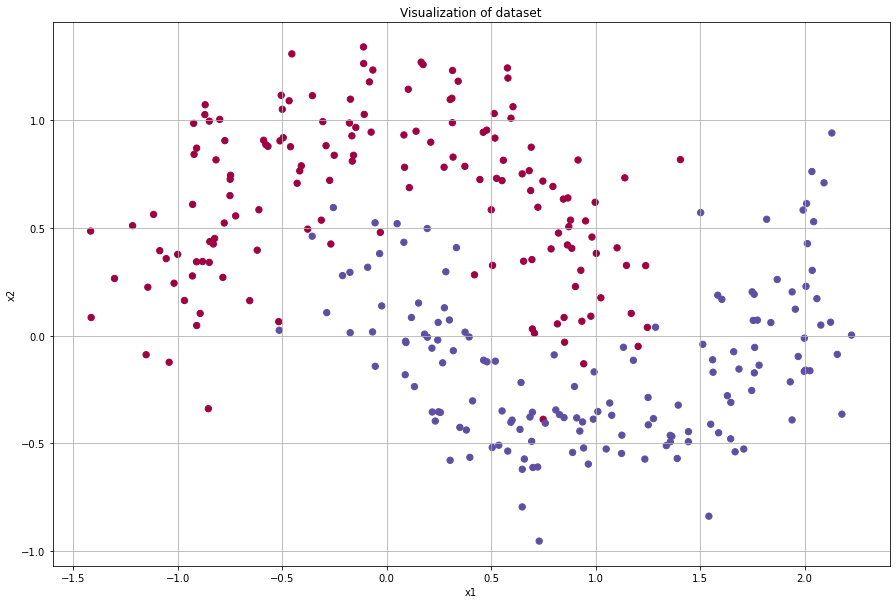

In [24]:
plt.subplots(figsize=(15,10))
train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
# Visualize the data
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral)
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Visualization of dataset')
train_X = train_X.T
train_Y = train_Y.reshape((1, train_Y.shape[0]))

In [25]:
m=train_X.shape
print(m)

(2, 300)


In [26]:
## importing deep layered Neural network 
from optimization import NN_deep_layered_optimized,predict,forward_propagation

### Running test cases to check if the NN is working or not

In [27]:
!pytest test_NN_deep_layer.py 

============================= test session starts =============================
platform win32 -- Python 3.7.4, pytest-5.4.2, py-1.8.1, pluggy-0.13.1
rootdir: C:\Users\VISWAMBHAR YASA\ML\Deep_learning\DEEP_LEARNING\Neural_network\Deep_layered_NN
collected 4 items

test_NN_deep_layer.py ....                                               [100%]

============================== 4 passed in 0.13s ==============================


## Multi layer Neural networt

In [28]:
layer_dims=[10, 5, 3, 1]
para,cost_gd=NN_deep_layered_optimized(train_X, train_Y, layer_dims, num_iter=5000,mini_batch_size=300, learning_rate=0.01, beta1=0.9, beta2=0.999,t=2, opt_type='gd', p_ty='He', print_cost=True)

Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
At Iteration 0  Cost Function  0.8107259451377301
At Iteration 1000  Cost Function  0.35017939470470244
At Iteration 2000  Cost Function  0.2728538055929256
At Iteration 3000  Cost Function  0.17566440061986208
At Iteration 4000  Cost Function  0.12289796563484515


In [29]:

print('TRAINING DATASET Using Gradient descent')
p_t=predict(train_X, train_Y, para, tol=0.5)

TRAINING DATASET Using Gradient descent
Hidden layer of the Neural Network 4
Accuracy: 96.00000000000001%


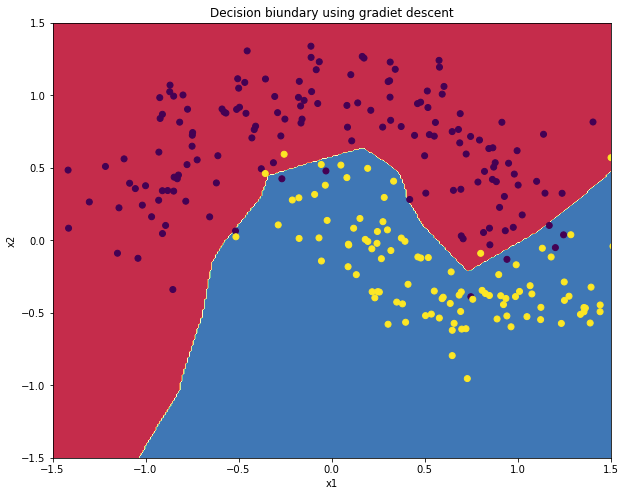

In [30]:
def pred(X, parameters, tol=0.5):
    m = X.shape[1]
    n_layers = len(parameters) // 2
    p = np.zeros((1, m))
    # Forward propagation
    probas, fw_caches = forward_propagation(X, parameters)
    # Activation function
    for i in range(0, probas.shape[1]):
        if probas[0, i] > tol:
            p[0, i] = 1
        else:
            p[0, i] = 0
    return p
X=train_X
Y=train_Y
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
ax,fig=plt.subplots(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title('Decision biundary using gradiet descent')
plt.scatter(X[0, :], X[1, :], c=Y)

In [31]:
layer_dims=[10, 5, 3, 1]
para,cost_mom=NN_deep_layered_optimized(train_X, train_Y, layer_dims, num_iter=2000,mini_batch_size=300, learning_rate=0.1, beta1=0.9, beta2=0.999,t=2, opt_type='mom', p_ty='He', print_cost=True)

Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
At Iteration 0  Cost Function  0.8107259451377301
At Iteration 1000  Cost Function  0.07890142223171767


In [32]:
print('TRAINING DATASET Using momentum')
p_t=predict(train_X, train_Y, para, tol=0.5)

TRAINING DATASET Using momentum
Hidden layer of the Neural Network 4
Accuracy: 97.66666666666669%


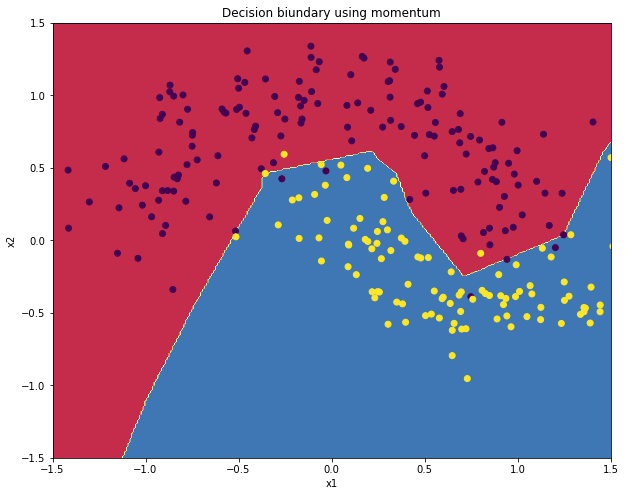

In [33]:
def pred(X, parameters, tol=0.5):
    m = X.shape[1]
    n_layers = len(parameters) // 2
    p = np.zeros((1, m))
    # Forward propagation
    probas, fw_caches = forward_propagation(X, parameters)
    # Activation function
    for i in range(0, probas.shape[1]):
        if probas[0, i] > tol:
            p[0, i] = 1
        else:
            p[0, i] = 0
    return p
X=train_X
Y=train_Y
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
ax,fig=plt.subplots(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title('Decision biundary using momentum')
plt.scatter(X[0, :], X[1, :], c=Y)

In [34]:
layer_dims=[10, 5, 3, 1]
para,cost_adam=NN_deep_layered_optimized(train_X, train_Y, layer_dims, num_iter=90,mini_batch_size=300, learning_rate=0.1, beta1=0.9, beta2=0.999,t=2, opt_type='adam', p_ty='He', print_cost=True)

Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
At Iteration 0  Cost Function  0.8107259451377301


In [35]:
print('TRAINING DATASET Using adam')
p_t=predict(train_X, train_Y, para, tol=0.5)

TRAINING DATASET Using adam
Hidden layer of the Neural Network 4
Accuracy: 97.33333333333334%


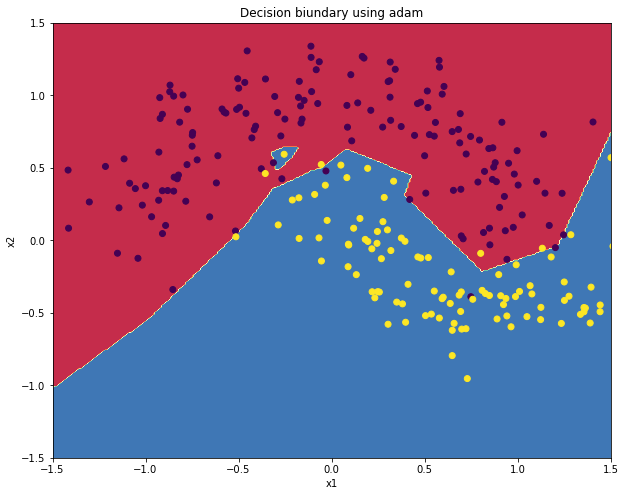

In [36]:
def pred(X, parameters, tol=0.5):
    m = X.shape[1]
    n_layers = len(parameters) // 2
    p = np.zeros((1, m))
    # Forward propagation
    probas, fw_caches = forward_propagation(X, parameters)
    # Activation function
    for i in range(0, probas.shape[1]):
        if probas[0, i] > tol:
            p[0, i] = 1
        else:
            p[0, i] = 0
    return p
X=train_X
Y=train_Y
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole grid
Z = pred(np.c_[xx.ravel(), yy.ravel()].T,para)
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
ax,fig=plt.subplots(figsize=(10,8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title('Decision biundary using adam')
plt.scatter(X[0, :], X[1, :], c=Y)

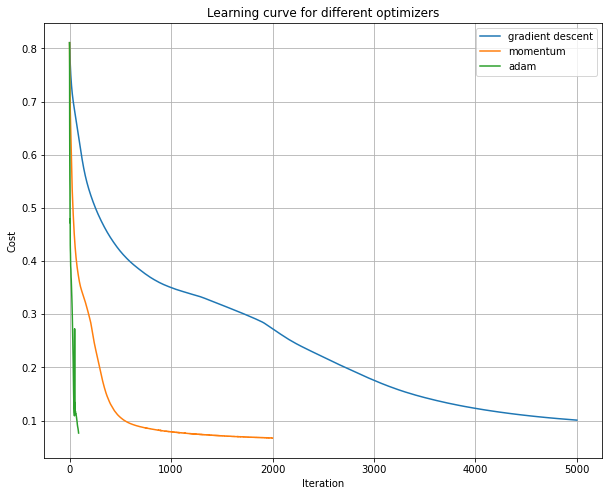

In [37]:
fig,ax=plt.subplots(figsize=(10,8))
ax.plot(cost_gd,'-',label='gradient descent')
ax.plot(cost_mom,'-',label='momentum')
ax.plot(cost_adam,'-',label='adam')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Learning curve for different optimizers')
plt.legend()
plt.grid()

In [38]:
layer_dims=[10, 5, 3, 1]
para,cost_gd=NN_deep_layered_optimized(train_X, train_Y, layer_dims, num_iter=5000,mini_batch_size=300, learning_rate=1, beta1=0.9, beta2=0.999,t=2, opt_type='gd', p_ty='He', print_cost=True, learning_dacay=True, decayrt=1, lr_type=0, time_interval=10)
  

Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
At Iteration 0  Cost Function  0.8107259451377301
learning rate after epoch 0  1
At Iteration 1000  Cost Function  0.3965668201030601
learning rate after epoch 1000  0.001
At Iteration 2000  Cost Function  0.3885045772563876
learning rate after epoch 2000  0.0005
At Iteration 3000  Cost Function  0.3842148107785821
learning rate after epoch 3000  0.0003333333333333333
At Iteration 4000  Cost Function  0.3813506135521562
learning rate after epoch 4000  0.00025


Gradient descent

 Optimizing learning rate using 0 type
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 83.0%

 Optimizing learning rate using 1 type
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 97.00000000000001%


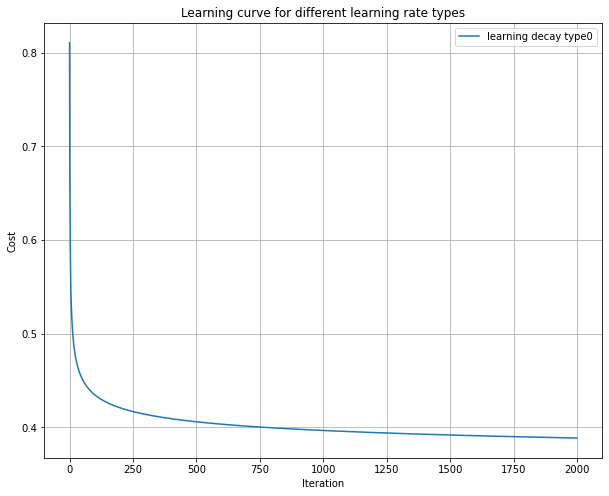

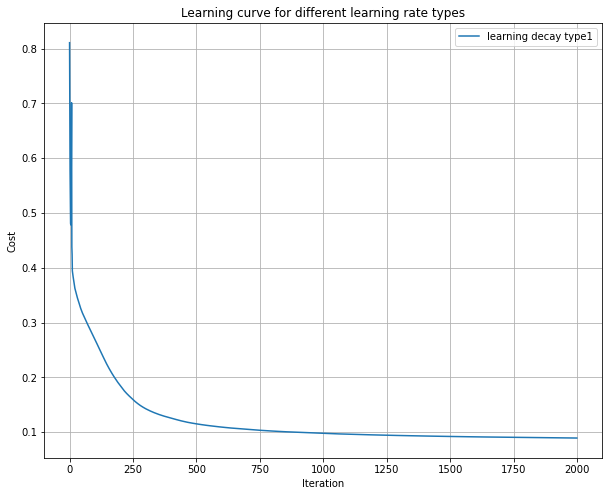

In [39]:
### Running Neural network for different learnig rate decay types
print('Gradient descent')
layer_dims=[10, 5, 3, 1]
ls=[0,1]
for i,p_t in enumerate(ls):
    print('\n Optimizing learning rate using', p_t,'type')
    layer_dims=[10, 5, 3, 1]
    para,cost_gd=NN_deep_layered_optimized(train_X, train_Y, layer_dims, num_iter=2000,mini_batch_size=300, learning_rate=1, beta1=0.9, beta2=0.999,t=2, opt_type='gd',            p_ty='He', print_cost=False, learning_dacay=True, decayrt=1, lr_type=p_t, time_interval=10) 
    print('TRAINING DATASET')
    p_train=predict(train_X, train_Y, para, tol=0.5)
    fig,ax=plt.subplots(figsize=(10,8))
    ax.plot(cost_gd,'-',label=('learning decay type'+str(i)))
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Learning curve for different learning rate types')
    plt.legend()
    plt.grid()

ADAM Gradient descent

 Optimizing learning rate using 0 type
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 83.33333333333334%

 Optimizing learning rate using 1 type
Number of Hidden layers in this Neural Network 4
Units in each layer [10, 5, 3, 1]
TRAINING DATASET
Hidden layer of the Neural Network 4
Accuracy: 97.00000000000001%


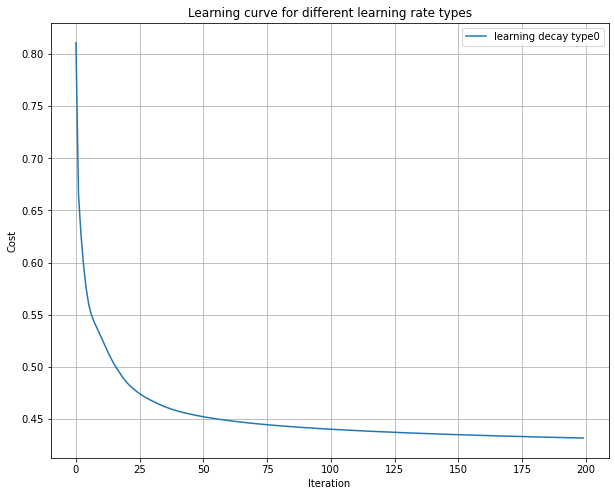

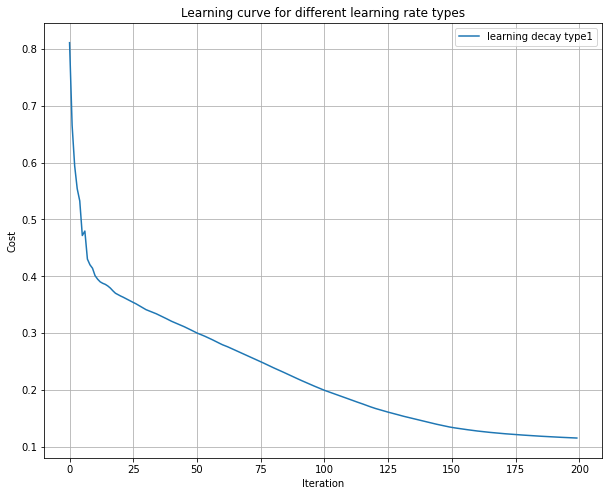

In [40]:
### Running Neural network for different learnig rate decay types
print('ADAM Gradient descent')
layer_dims=[10, 5, 3, 1]
ls=[0,1]
for i,p_t in enumerate(ls):
    print('\n Optimizing learning rate using', p_t,'type')
    layer_dims=[10, 5, 3, 1]
    para,cost_gd=NN_deep_layered_optimized(train_X, train_Y, layer_dims, num_iter=200,mini_batch_size=300, learning_rate=0.1, beta1=0.9, beta2=0.999,t=2, opt_type='adam',            p_ty='He', print_cost=False, learning_dacay=True, decayrt=1, lr_type=p_t, time_interval=10) 
    print('TRAINING DATASET')
    p_train=predict(train_X, train_Y, para, tol=0.5)
    fig,ax=plt.subplots(figsize=(10,8))
    ax.plot(cost_gd,'-',label=('learning decay type'+str(i)))
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Learning curve for different learning rate types')
    plt.legend()
    plt.grid()